In [24]:
import pandas as pd

# Dataset Overview

In [25]:
df_netflix = pd.read_csv('netflix_titles.csv')

In [26]:
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [27]:
df_netflix.shape

(8807, 12)

# Identify missing data

In [28]:
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [29]:
for column in df_netflix.columns:
    percentage = df_netflix[column].isnull().mean()
    print(f"{column}: {round((percentage * 100), 2)}%")

show_id: 0.0%
type: 0.0%
title: 0.0%
director: 29.91%
cast: 9.37%
country: 9.44%
date_added: 0.11%
release_year: 0.0%
rating: 0.05%
duration: 0.03%
listed_in: 0.0%
description: 0.0%


# Deal with the missing data

In [30]:
# Drop only rows with NaN director by their index

no_director_cells = df_netflix['director'].isnull()

In [31]:
no_director_rows = df_netflix[no_director_cells]
no_director_rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [32]:
no_director_rows.index

Index([   1,    3,    4,   10,   14,   15,   17,   19,   21,   25,
       ...
       8775, 8780, 8783, 8784, 8785, 8795, 8796, 8797, 8800, 8803],
      dtype='int64', length=2634)

In [33]:
df_netflix.drop(no_director_rows.index, axis=0, inplace=True)

In [34]:
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [35]:
# Replace NaN with fillna()

most_frequent_rating = df_netflix['rating'].mode()
most_frequent_rating

0    TV-MA
Name: rating, dtype: object

In [36]:
type(most_frequent_rating)

pandas.core.series.Series

In [37]:
most_frequent_rating_as_str = ''.join(most_frequent_rating)

In [38]:
df_netflix['rating'].fillna(most_frequent_rating_as_str, inplace=True)

In [39]:
df_netflix['rating'].isnull().sum()

0

In [40]:
# Replace by arbitrary  number

df_netflix['rating'].fillna('0', inplace=True)

In [41]:
# Replace with backward/forward value

df_netflix.fillna(method='ffill')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [42]:
# Split the duration of movies only and take just the minutes

movie_filter = df_netflix['type'] == 'Movie'
df_movie = df_netflix[movie_filter]
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [43]:
df_movie['duration'].fillna('0', inplace=True)
df_movie['duration'].str.split(expand=True)[0]

C:\Users\yomax\AppData\Local\Temp\ipykernel_9328\1965999801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration'].fillna('0', inplace=True)


0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: 0, Length: 5943, dtype: object

In [44]:
# Ad as new column

df_movie['minutes'] = df_movie['duration'].str.split(expand=True)[0].astype(int)
df_movie

C:\Users\yomax\AppData\Local\Temp\ipykernel_9328\1369232771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['minutes'] = df_movie['duration'].str.split(expand=True)[0].astype(int)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


In [45]:
df_movie.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
minutes          int32
dtype: object

In [84]:
df_movie['date_added'].str.split(',')

0       [September 25,  2021]
6       [September 24,  2021]
7       [September 24,  2021]
9       [September 24,  2021]
12      [September 23,  2021]
                ...          
8801         [March 9,  2016]
8802     [November 20,  2019]
8804      [November 1,  2019]
8805      [January 11,  2020]
8806         [March 2,  2019]
Name: date_added, Length: 5943, dtype: object

In [79]:
df_movie['date_added'].str.extract('(\w+)')

,0
0,September
6,September
7,September
9,September
12,September
...,...
8801,March
8802,November
8804,November
8805,January


In [83]:
df_movie['date_added'].str.extract('(\d{4})')

,0
0,2021
6,2021
7,2021
9,2021
12,2021
...,...
8801,2016
8802,2019
8804,2019
8805,2020


# Identify outliers

<Axes: ylabel='Frequency'>

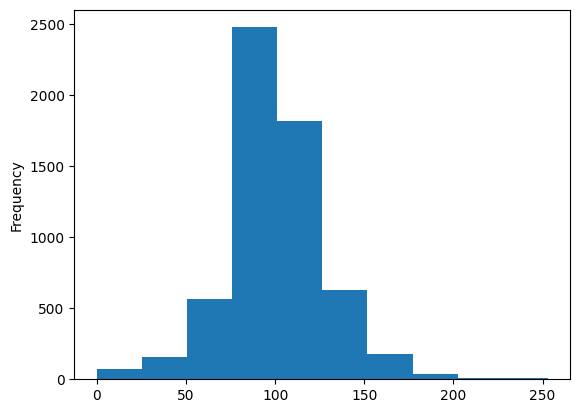

In [87]:
df_movie['minutes'].plot(kind='hist', bins=10)

In [95]:
df_movie['minutes'].value_counts(bins=10).sort_index()

minutes
(-0.254, 25.3]      72
(25.3, 50.6]       157
(50.6, 75.9]       567
(75.9, 101.2]     2475
(101.2, 126.5]    1813
(126.5, 151.8]     631
(151.8, 177.1]     178
(177.1, 202.4]      34
(202.4, 227.7]      10
(227.7, 253.0]       6
Name: count, dtype: int64

In [99]:
# DF without outliers
df_movie[(df_movie['minutes'] > 25) & (df_movie['minutes'] < 177)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


In [100]:
# DF only with the outliers
df_movie[~(df_movie['minutes'] > 25) & (df_movie['minutes'] < 177)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13
694,s695,Movie,Aziza,Soudade Kaadan,"Caress Bashar, Abdel Moneim Amayri","Lebanon, Syria","June 17, 2021",2019,TV-PG,13 min,"Comedies, Dramas, Independent Movies",This short film follows a newly displaced Syri...,13
695,s696,Movie,Besieged Bread,Soudade Kaadan,"Lama Hakeim, Gabriel Malki, Ehab Shaaban",NaN,"June 17, 2021",2015,TV-14,12 min,"Dramas, International Movies","In battle-ridden Syria, a woman trying to smug...",12
811,s812,Movie,Super Monsters: Once Upon a Rhyme,Steve Ball,"Elyse Maloway, Vincent Tong, Andrea Libman, Al...",NaN,"June 2, 2021",2021,TV-Y,25 min,Children & Family Movies,"From Goldilocks to Hansel and Gretel, the Supe...",25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7314,s7315,Movie,Little Lunch: The Nightmare Before Graduation,Robyn Butler,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"March 15, 2018",2016,TV-Y7,25 min,"Children & Family Movies, Comedies",Mrs. Gonsha's students are excited about the e...,25
7499,s7500,Movie,Monster High: New Ghoul at School,"Audu Paden, Eric Radomski","Kate Higgins, Salli Saffioti, Debi Derryberry,...",United States,"October 1, 2017",2010,TV-Y7,23 min,Children & Family Movies,Insecure new student Frankie Stein struggles t...,23
7788,s7789,Movie,Power Rangers: Megaforce: The Robo Knight Befo...,James Barr,"Andrew M. Gray, Ciara Hanna, John Mark Louderm...",United States,"January 1, 2016",2013,TV-Y7,24 min,Children & Family Movies,Robo Knight learns the meaning of Christmas fr...,24
7848,s7849,Movie,Refugee,"Clementine Malpas, Leslie Knott","Cate Blanchett, Lynsey Addario, Omar Victor Di...",NaN,"March 10, 2017",2016,TV-PG,24 min,Documentaries,Five acclaimed photographers travel the world ...,24
